# **This is an EDA on Covid-19 medical reports.**

> **Checking out the path of the dataset.**

In [33]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


>**Importing the necessary libraries.**

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns

>**Importing the data.**

In [35]:
data=pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

>**Understanding the data.**

In [36]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [37]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [38]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [39]:
data.shape

(49068, 10)

In [40]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [41]:
data.nunique()

Province/State       78
Country/Region      187
Lat                 260
Long                261
Date                188
Confirmed         10861
Deaths             3640
Recovered          7609
Active             8641
WHO Region            6
dtype: int64

In [42]:
data['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

>**Cleaning the data.**

In [57]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

>**Dropping the redundant (unecessary) data.**

In [52]:
report=data.drop(['Province/State','Country/Region'],axis=1)

>**Reprinting the dataset after removing the unecessary data.**

In [53]:
report.head()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


>**Relationship analysis.**

In [58]:
numeric_columns = report.select_dtypes(include=['number']).columns
corelation=report[numeric_columns].corr()
print(corelation)

                Lat      Long  Confirmed    Deaths  Recovered    Active
Lat        1.000000 -0.127259   0.036665  0.070040   0.015329  0.044392
Long      -0.127259  1.000000  -0.078911 -0.101340  -0.052391 -0.085688
Confirmed  0.036665 -0.078911   1.000000  0.912361   0.895506  0.950255
Deaths     0.070040 -0.101340   0.912361  1.000000   0.763090  0.891858
Recovered  0.015329 -0.052391   0.895506  0.763090   1.000000  0.713088
Active     0.044392 -0.085688   0.950255  0.891858   0.713088  1.000000


>**Generating a heatmap on the present data.**

<Axes: >

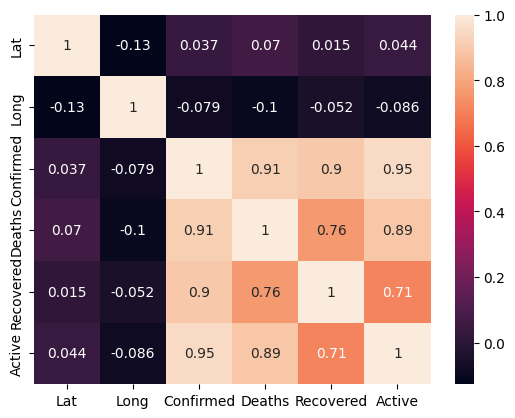

In [47]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

>**Pairplot.**

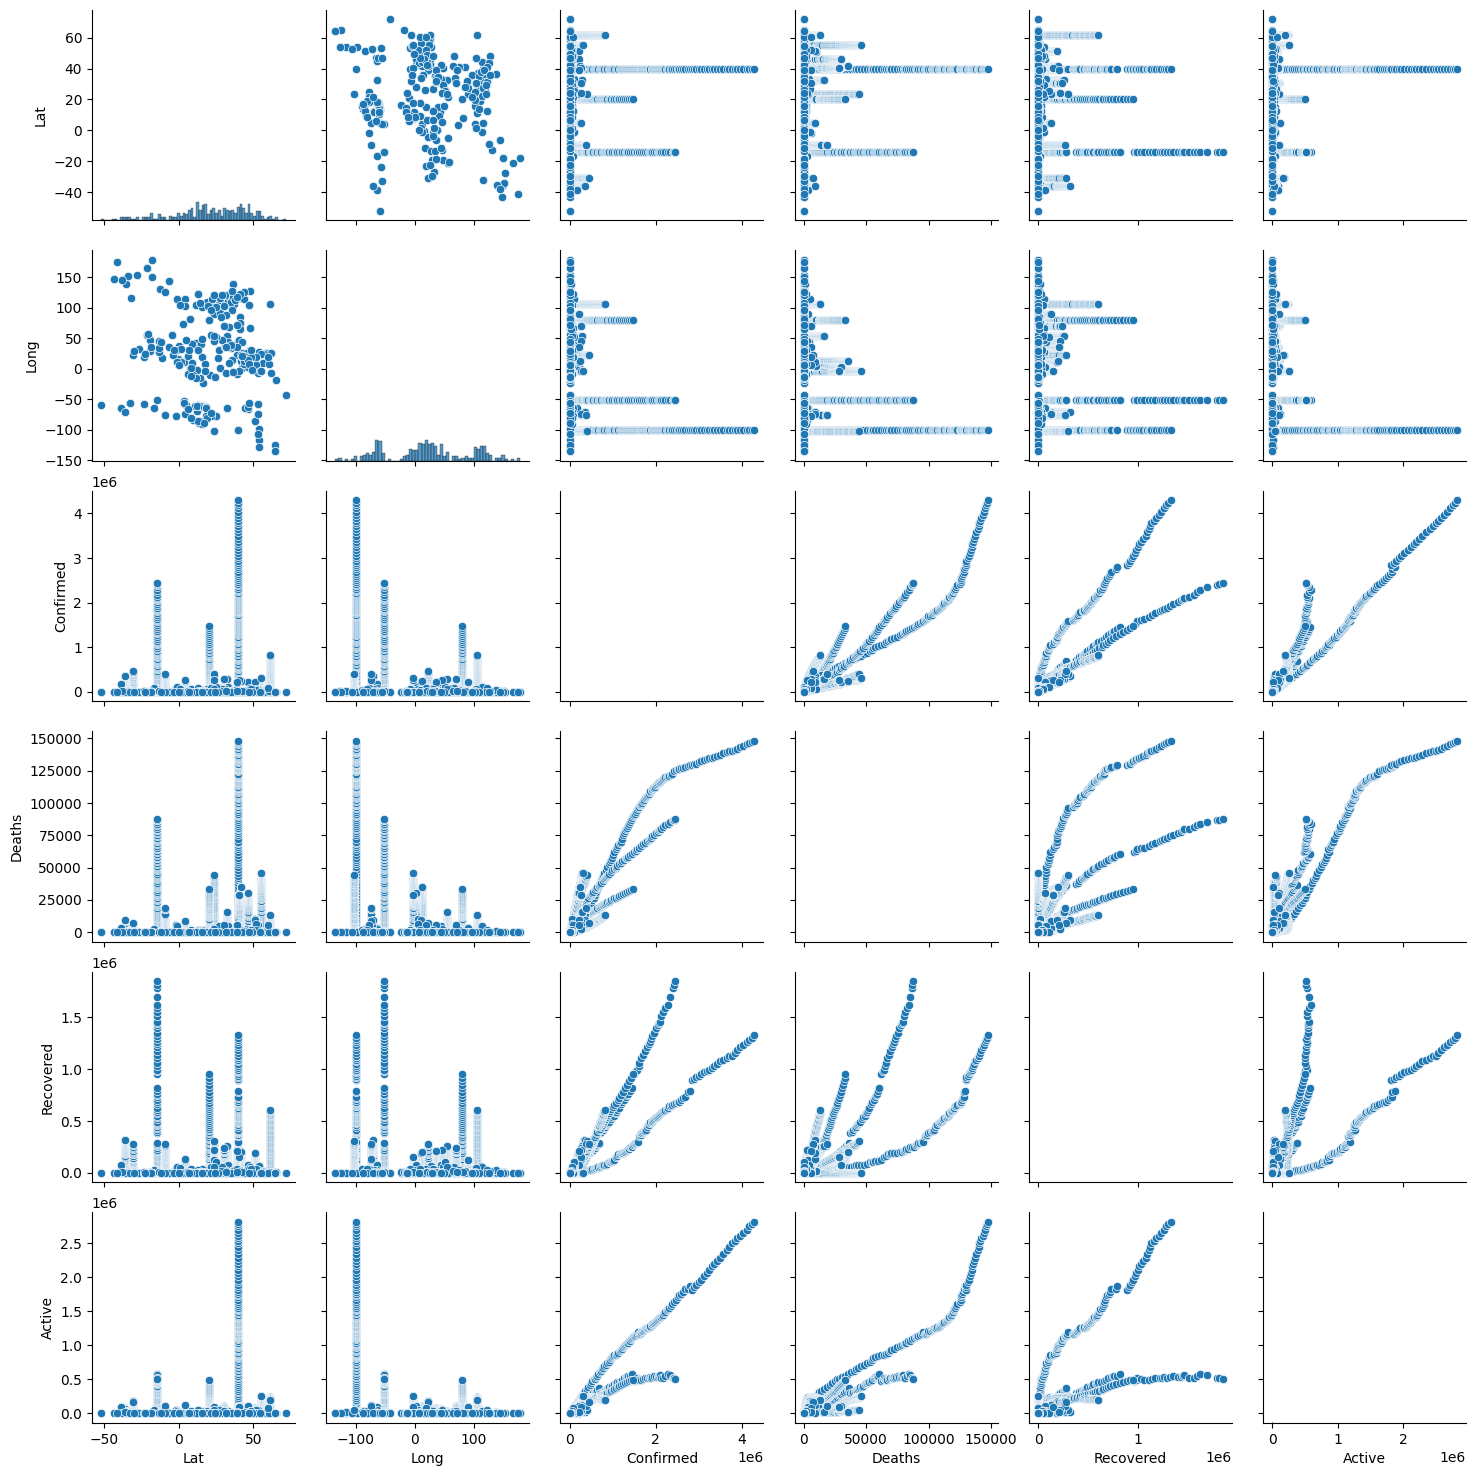

In [55]:
sns.pairplot(report)

>**Relational plot.**

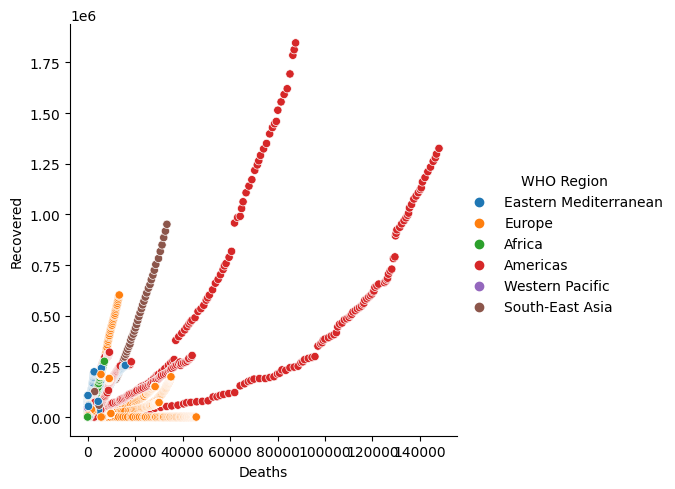

In [56]:
sns.relplot(x='Deaths',y='Recovered',hue='WHO Region',data=report)

>**Histogram.**

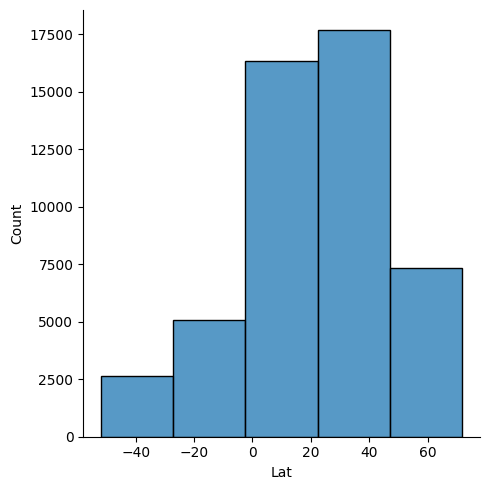

In [59]:
sns.displot(report['Lat'],bins=5)

>**Box plot.**

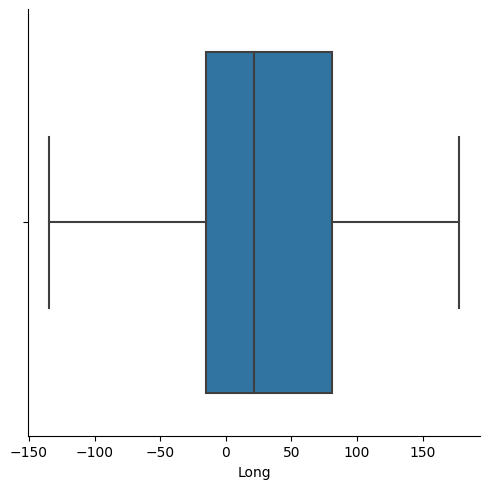

In [60]:
sns.catplot(x='Long',kind='box',data=report)